In [1]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
import optuna
import matplotlib
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

%matplotlib inline

In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Load the train, validation and test data

# Train data (with images)
traindata = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/multimodal_train.tsv',sep='\t')
# Validation data (with images)
validata = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/multimodal_validate.tsv',sep='\t')
# Test data (with  images)
testdata = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/multimodal_test_public.tsv',sep='\t')


# Train data (with and without  images)
traindata_all = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/all_train.tsv',sep='\t')
# Validation data (with and without images images)
validata_all = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/all_validate.tsv',sep='\t')
# Test data (with and without images)
testdata_all = pd.read_csv('/content/gdrive/MyDrive/Infosys Multimodal dataset fake news detection/all_test_public.tsv',sep='\t')

In [6]:
print("Number of train instances for all data: ", len(traindata_all))
print("Number of validation instances for all data: ", len(validata_all))
print("Number of test instances for all data: ", len(testdata_all))

Number of train instances for all data:  878218
Number of validation instances for all data:  92444
Number of test instances for all data:  92444


In [7]:
print("Number of train instances for multimodal data: ", len(traindata))
print("Number of validation instances for multimodal data: ", len(validata))
print("Number of test instances for multimodal data: ", len(testdata))

Number of train instances for multimodal data:  564000
Number of validation instances for multimodal data:  59342
Number of test instances for multimodal data:  59319


In [8]:
traindata.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['created_utc'].plot(kind='hist', bins=20, title='created_utc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('author').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('clean_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('domain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='created_utc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='created_utc', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='num_comments', y='score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='score', y='upvote_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['created_utc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('author')):
  _plot_series(series, series_name, i)
  fig.legend(title='author', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('created_utc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['created_utc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_title')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('created_utc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['created_utc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('domain')):
  _plot_series(series, series_name, i)
  fig.legend(title='domain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('created_utc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['created_utc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('created_utc')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['created_utc'].plot(kind='line', figsize=(8, 4), title='created_utc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_title'].value_counts()
    for x_label, grp in _df_20.groupby('author')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('author')
_ = plt.ylabel('clean_title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['domain'].value_counts()
    for x_label, grp in _df_21.groupby('clean_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('clean_title')
_ = plt.ylabel('domain')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['id'].value_counts()
    for x_label, grp in _df_22.groupby('domain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('domain')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_url'].value_counts()
    for x_label, grp in _df_23.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('image_url')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['author'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='author', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['clean_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='clean_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['domain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='domain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
print("Number of train instances that have images: ",len(traindata[traindata['hasImage'] == True]))
print("Number of validation instances that have images: ",len(validata[validata['hasImage'] == True]))
print("Number of test instances that have images: ",len(testdata[testdata['hasImage'] == True]))

Number of train instances that have images:  564000
Number of validation instances that have images:  59342
Number of test instances that have images:  59319


In [10]:
print("Number of train instances that don`t have images: ",len(traindata_all[traindata_all['hasImage'] == False]))
print("Number of validation instances don't that have images: ",len(validata_all[validata_all['hasImage'] == False]))
print("Number of test instances that don`t have images: ",len(testdata_all[testdata_all['hasImage'] == False]))

Number of train instances that don`t have images:  239117
Number of validation instances don't that have images:  25236
Number of test instances that don`t have images:  25189


In [11]:
print("Columns in traindata_all:", traindata_all.columns)
print("Columns in validata_all:", validata_all.columns)
print("Columns in testdata_all:", testdata_all.columns)

Columns in traindata_all: Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'author', 'clean_title ', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')
Columns in validata_all: Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')
Columns in testdata_all: Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_r

In [12]:
# MULTIMODAL DATASET
# Train data with no missing values
train_data = traindata[traindata['clean_title'].notnull().to_numpy()]
# Validation data with no missing values
valid_data = validata[validata['clean_title'].notnull().to_numpy()]
# Test data with no missing values
test_data = testdata[testdata['clean_title'].notnull().to_numpy()]

# UNIMODAL DATASET
train_data_all = traindata_all[traindata_all['clean_title '].notnull().to_numpy()]
# Validation data with no missing values
valid_data_all = validata_all[validata_all['clean_title'].notnull().to_numpy()]
# Test data with no missing values
test_data_all = testdata_all[testdata_all['clean_title'].notnull().to_numpy()]

In [13]:
# Get series object with the necessary columns

# MULTIMODAL DATASET
# Train data (text and labels)
train_frame = train_data["clean_title"]
train_labels = train_data["6_way_label"]
# Validation data (text and labels)
valid_frame = valid_data["clean_title"]
valid_labels = valid_data["6_way_label"]
# Test data (text and labels)
test_frame = test_data["clean_title"]
test_labels = test_data["6_way_label"]

# UNIMODAL DATASET
train_frame_all = train_data_all["clean_title "]
train_labels_all = train_data_all["6_way_label"]
# Validation data (text and labels)
valid_frame_all = valid_data_all["clean_title"]
valid_labels_all = valid_data_all["6_way_label"]
# Test data (text and labels)
test_frame_all = test_data_all["clean_title"]
test_labels_all = test_data_all["6_way_label"]

##Class distribution for the unimodal dataset
Train partition

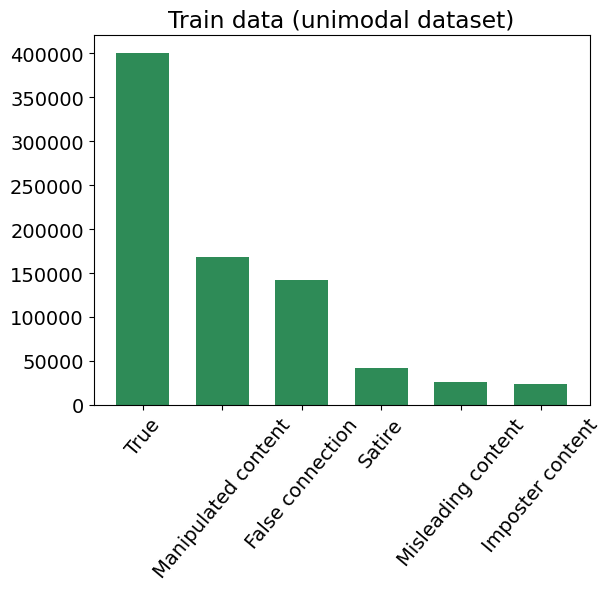

In [14]:
import matplotlib
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = train_labels_all.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2, color='seagreen' )
plt.title("Train data (unimodal dataset)")
plt.xticks(rotation=50)
plt.show()

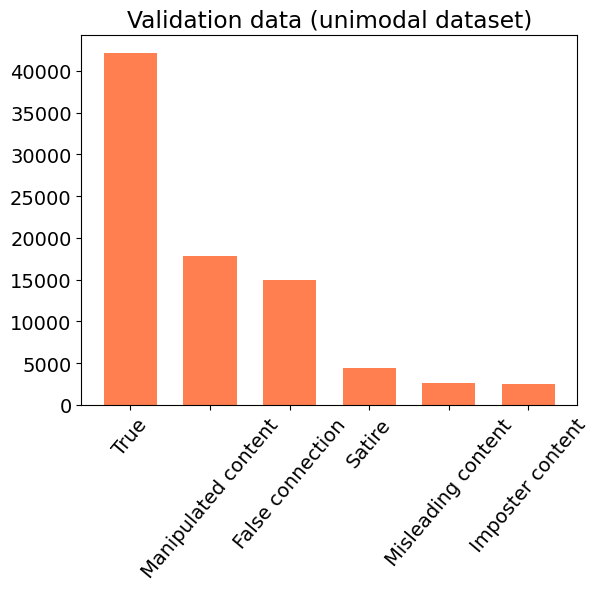

In [15]:
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = valid_labels_all.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2, color='coral' )
plt.title("Validation data (unimodal dataset)")
plt.xticks(rotation=50)
plt.show()

##Test data

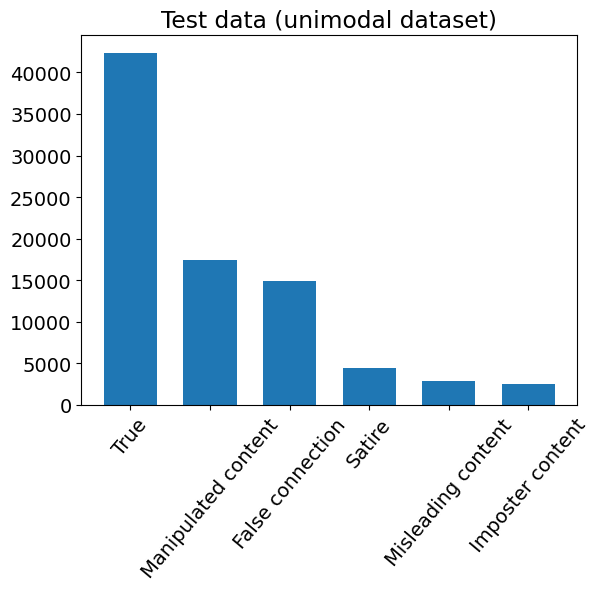

In [16]:
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = test_labels_all.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2 )
plt.title("Test data (unimodal dataset)")
plt.xticks(rotation=50)
plt.show()

##Class distribution for the multimodal dataset
Train data

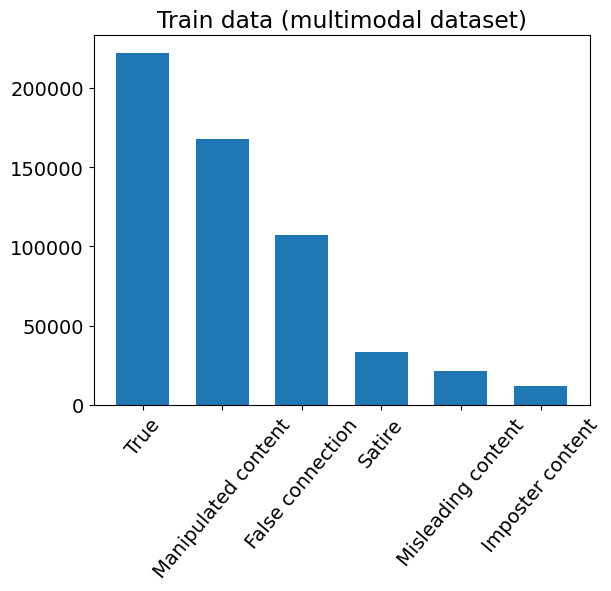

In [17]:
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = train_labels.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2 )
plt.title("Train data (multimodal dataset)")
plt.xticks(rotation=50)
plt.show()

##Validation

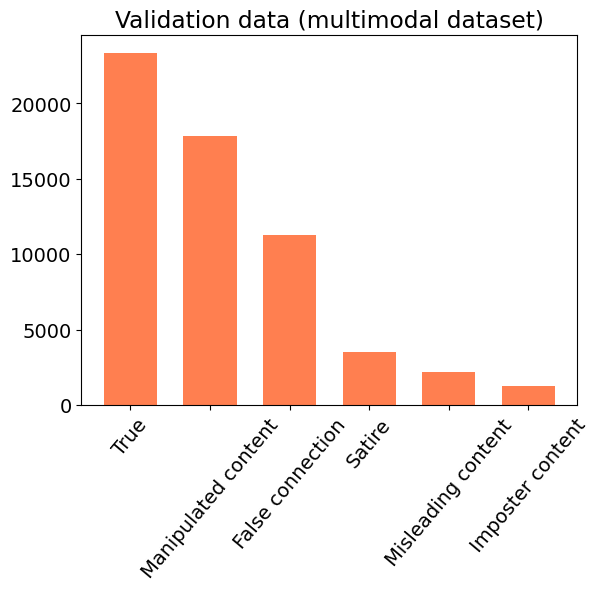

In [18]:
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = valid_labels.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2,color='coral' )
plt.title("Validation data (multimodal dataset)")
plt.xticks(rotation=50)
plt.show()

##Test Data

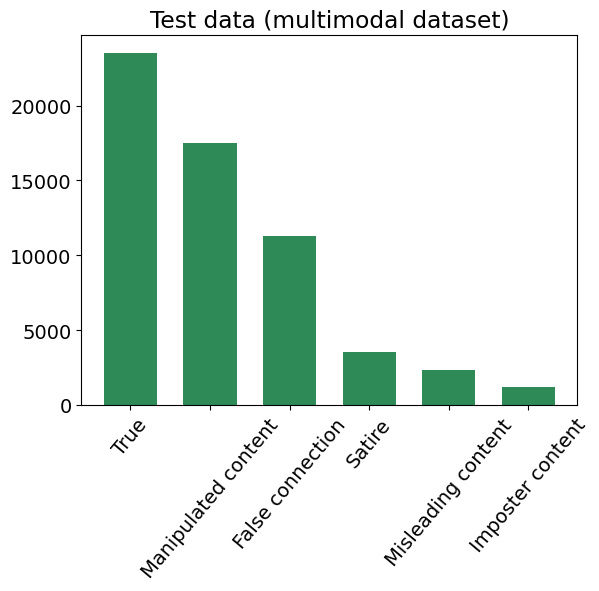

In [19]:
font = {'size'   : 14}

matplotlib.rc('font', **font)
# Train labels barplot
labs = test_labels.value_counts()
labels = ['True','Manipulated content','False connection','Satire','Misleading content','Imposter content']
x_pos_labels = [1, 4, 7, 10, 13, 16]
x_pos_labs = [1, 4, 7, 10, 13, 16]
plt.xticks(x_pos_labels, labels)
plt.bar(x_pos_labs, height = labs, width = 2, color='seagreen' )
plt.title("Test data (multimodal dataset)")
plt.xticks(rotation=50)
plt.show()

##Multi-Class Text Classification

In [20]:
# Get series object with the necessary columns

# Train data (text and labels)
train_frame = train_data["clean_title"]
train_labels = train_data["6_way_label"]
# Validation data (text and labels)
valid_frame = valid_data["clean_title"]
valid_labels = valid_data["6_way_label"]
# Test data (text and labels)
test_frame = test_data["clean_title"]
test_labels = test_data["6_way_label"]


In [21]:
labels = ['True','Satire','False connection','Imposter content','Manipulated content','Misleading content']
# Train data
train_0 = sum(train_labels == 0)/len(train_labels)
train_1 = sum(train_labels == 1)/len(train_labels)
train_2 = sum(train_labels == 2)/len(train_labels)
train_3 = sum(train_labels == 3)/len(train_labels)
train_4 = sum(train_labels == 4)/len(train_labels)
train_5 = sum(train_labels == 5)/len(train_labels)
# Validation data
validation_0 = sum(valid_labels == 0)/len(valid_labels)
validation_1 = sum(valid_labels == 1)/len(valid_labels)
validation_2 = sum(valid_labels == 2)/len(valid_labels)
validation_3 = sum(valid_labels == 3)/len(valid_labels)
validation_4 = sum(valid_labels == 4)/len(valid_labels)
validation_5 = sum(valid_labels == 5)/len(valid_labels)
# Test data
test_0 = sum(test_labels == 0)/len(test_labels)
test_1 = sum(test_labels == 1)/len(test_labels)
test_2 = sum(test_labels == 2)/len(test_labels)
test_3 = sum(test_labels == 3)/len(test_labels)
test_4 = sum(test_labels == 4)/len(test_labels)
test_5 = sum(test_labels == 5)/len(test_labels)

d = {"Label":labels, "Traindata": [train_0, train_1, train_2, train_3, train_4, train_5],
                  "Validata": [validation_0, validation_1, validation_2, validation_3, validation_4, validation_5],
                  "Testdata": [test_0, test_1, test_2, test_3, test_4, test_5]}

proportion_data = pd.DataFrame(data = d)
proportion_data

,Label,Traindata,Validata,Testdata
0,True,0.393761,0.392976,0.396281
1,Satire,0.059363,0.059334,0.059239
2,False connection,0.190108,0.190034,0.190445
3,Imposter content,0.020894,0.020862,0.020634
4,Manipulated content,0.297619,0.300125,0.294543
5,Misleading content,0.038255,0.036669,0.038858


##Hyperparameter tuning

In [22]:
# Convert 'series' data to list

## Texts ##

# Train
train_list = list(train_frame)
# Valid
valid_list = list(valid_frame)
# Test
test_list = list(test_frame)

## Labels ##

# Train
train_labels_list = list(train_labels)
# Valid
valid_labels_list = list(valid_labels)
# Test
test_labels_list = list(test_labels)

In [23]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


In [24]:
# Remove puntuations and numbers and multiple spaces

train_news_clean_1 = []
valid_news_clean_1 = []
test_news_clean_1 = []
# Train
for new in train_list:
    train_news_clean_1.append(preprocess_text(new))
# Validation
for new in valid_list:
    valid_news_clean_1.append(preprocess_text(new))
# Test
for new in test_list:
    test_news_clean_1.append(preprocess_text(new))

##Stemmed and lemmatized data
We obtain the stemmed and lemmatized data

In [25]:
# Initialize stemmer and stop_words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords_stem(text):
    text = word_tokenize(text)
    # Stop words removal
    text = [word for word in text if word not in stop_words]
    # Stemming
    stemmed_text = [stemmer.stem(word) for word in text]
    text_done = ' '.join(stemmed_text)
    return text_done

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
# Train stemmed
train_stemmed = [remove_stopwords_stem(text) for text in train_news_clean_1]
# Validation stemmed
valid_stemmed = [remove_stopwords_stem(text) for text in valid_news_clean_1]
# Test stemmed
test_stemmed = [remove_stopwords_stem(text) for text in test_news_clean_1]

In [27]:
# Initialize lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Initialize stemmer and stop_words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords_lem(text):
    text = word_tokenize(text)
    # Stop words removal
    text = [word for word in text if word not in stop_words]
    # Lematization
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos = "n")
        word2 = lemmatizer.lemmatize(word1, pos = "v")
        word3 = lemmatizer.lemmatize(word2, pos = ("a"))
        lemmatized_text.append(word3)
    text_done = ' '.join(lemmatized_text)
    return text_done

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [28]:
# Train lemmatized
train_lemmatized = [remove_stopwords_lem(text) for text in train_news_clean_1]
# Validation lemmatized
valid_lemmatized = [remove_stopwords_lem(text) for text in valid_news_clean_1]
# Test lemmatized
test_lemmatized = [remove_stopwords_lem(text) for text in test_news_clean_1]

##Stemming
Multinomial Naive Bayes

In [30]:


import optuna

# Define function to be optimized
def objective_Bayes(trial):

    # Sample values for the hyper-parameters
    n = trial.suggest_int("n", 1, 2)
    # Sample a boolean value for sublinear_tf
    sub_tf = trial.suggest_categorical("sub_tf", [True, False])
    min_df = trial.suggest_int("min_df",5,25)
    # Create pipeline
    Bayes_pipe = Pipeline([('vect', CountVectorizer(ngram_range = (1, n), min_df = min_df)),
                            ('tfidf', TfidfTransformer(sublinear_tf = sub_tf)),('classifier', MultinomialNB() )])
    # Fit model
    clf_Bayes = Bayes_pipe.fit(train_stemmed, train_labels_list)
    # Obtain the predictions
    predictions = Bayes_pipe.predict(valid_stemmed)
    # Obtain the accuracy
    acc = accuracy_score(valid_labels_list, predictions)

    return acc

# Select budget and set seed
budget = 10
np.random.seed(0)
# Optimize hyper-parameters
study_Bayes = optuna.create_study(direction="maximize")
study_Bayes.optimize(objective_Bayes, n_trials=budget,show_progress_bar=False)

# Best hyper-parameters
print("Best hyper-parameters: ")
print(study_Bayes.best_params)
# Best score
print("Best score: ")
print(study_Bayes.best_value)

[I 2024-06-20 15:20:25,023] A new study created in memory with name: no-name-6012551c-ebb3-4d23-986e-a046c279b695
[I 2024-06-20 15:20:33,560] Trial 0 finished with value: 0.6317616527922888 and parameters: {'n': 1, 'sub_tf': True, 'min_df': 10}. Best is trial 0 with value: 0.6317616527922888.
[I 2024-06-20 15:20:39,541] Trial 1 finished with value: 0.6322334939840248 and parameters: {'n': 1, 'sub_tf': False, 'min_df': 9}. Best is trial 1 with value: 0.6322334939840248.
[I 2024-06-20 15:20:44,551] Trial 2 finished with value: 0.6239594216575107 and parameters: {'n': 1, 'sub_tf': True, 'min_df': 24}. Best is trial 1 with value: 0.6322334939840248.
[I 2024-06-20 15:20:57,845] Trial 3 finished with value: 0.6348117690674396 and parameters: {'n': 2, 'sub_tf': True, 'min_df': 20}. Best is trial 3 with value: 0.6348117690674396.
[I 2024-06-20 15:21:04,135] Trial 4 finished with value: 0.625931043780122 and parameters: {'n': 1, 'sub_tf': False, 'min_df': 19}. Best is trial 3 with value: 0.6348

Best hyper-parameters: 
{'n': 2, 'sub_tf': False, 'min_df': 5}
Best score: 
0.649759023962792


##Logistic Regression

In [31]:


import optuna

# Define function to be optimized
def objective_Logistic(trial):

    # Sample values for the hyper-parameters
    max_iter = trial.suggest_int("max_iter", 320, 420)
    solver = trial.suggest_categorical("solver", ["newton-cg"])
    multi_class = trial.suggest_categorical("multi_class",["ovr", "multinomial"])
    n = trial.suggest_int("n", 1, 2)
    min_df = trial.suggest_int("min_df",5,25)
    # Sample a boolean value for sublinear_tf
    sub_tf = trial.suggest_categorical("sub_tf", [True, False]) # Changed to list of booleans
    # Create pipeline
    Logistic_pipe = Pipeline([('vect', CountVectorizer(ngram_range = (1, n), min_df = min_df)),
                            ('tfidf', TfidfTransformer(sublinear_tf = sub_tf)),('classifier', LogisticRegression(random_state = 3,
                                    solver = solver, multi_class = multi_class,   max_iter = max_iter ) )])

    # Fit model
    clf_Logistic = Logistic_pipe.fit(train_stemmed, train_labels_list)
    # Obtain the predictions
    predictions = Logistic_pipe.predict(valid_stemmed)
    # Obtain the accuracy
    acc = accuracy_score(valid_labels_list, predictions)

    return acc

# Select budget and set seed
budget = 10
np.random.seed(0)
# Optimize hyper-parameters
study_Logistic = optuna.create_study(direction="maximize")
study_Logistic.optimize(objective_Logistic, n_trials=budget,show_progress_bar=False)

# Best hyper-parameters
print("Best hyper-parameters: ")
print(study_Logistic.best_params)
# Best score
print("Best score: ")
print(study_Logistic.best_value)

[I 2024-06-20 15:22:03,564] A new study created in memory with name: no-name-3fa31d02-55b9-479e-9c72-2a492e4ce0fc
[I 2024-06-20 15:22:50,106] Trial 0 finished with value: 0.6941626503993799 and parameters: {'max_iter': 369, 'solver': 'newton-cg', 'multi_class': 'ovr', 'n': 1, 'min_df': 23, 'sub_tf': False}. Best is trial 0 with value: 0.6941626503993799.
[I 2024-06-20 15:24:46,949] Trial 1 finished with value: 0.7117555862626808 and parameters: {'max_iter': 320, 'solver': 'newton-cg', 'multi_class': 'multinomial', 'n': 2, 'min_df': 12, 'sub_tf': False}. Best is trial 1 with value: 0.7117555862626808.
[I 2024-06-20 15:27:20,361] Trial 2 finished with value: 0.7145866334130969 and parameters: {'max_iter': 323, 'solver': 'newton-cg', 'multi_class': 'multinomial', 'n': 2, 'min_df': 5, 'sub_tf': True}. Best is trial 2 with value: 0.7145866334130969.
[I 2024-06-20 15:28:24,499] Trial 3 finished with value: 0.6954265107343871 and parameters: {'max_iter': 338, 'solver': 'newton-cg', 'multi_cla

Best hyper-parameters: 
{'max_iter': 323, 'solver': 'newton-cg', 'multi_class': 'multinomial', 'n': 2, 'min_df': 5, 'sub_tf': True}
Best score: 
0.7145866334130969


##Random Forest

In [32]:


import optuna

# Define function to be optimized
def objective_Forest(trial):

    # Sample values for the hyper-parameters
    n_estimators = trial.suggest_int("n_estimators", 100, 300)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 3, 6)
    n = trial.suggest_int("n", 1, 2)
    min_df = trial.suggest_int("min_df",5,25)
    # Sample a boolean value for sublinear_tf
    sub_tf = trial.suggest_categorical("sub_tf", [True, False])
    # Create pipeline
    Forest_pipe = Pipeline([('vect', CountVectorizer(ngram_range = (1, n), min_df = min_df)),
                            ('tfidf', TfidfTransformer(sublinear_tf = sub_tf)),('classifier', RandomForestClassifier(
                                random_state = 3, n_estimators = n_estimators, criterion = criterion,
                                max_depth = max_depth ) )])

    # Fit model
    clf_Forest = Forest_pipe.fit(train_stemmed, train_labels_list)
    # Obtain the predictions
    predictions = Forest_pipe.predict(valid_stemmed)
    # Obtain the accuracy
    acc = accuracy_score(valid_labels_list, predictions)

    return acc

# Select budget and set seed
budget = 10
np.random.seed(0)
# Optimize hyper-parameters
study_Forest = optuna.create_study(direction="maximize")
study_Forest.optimize(objective_Forest, n_trials=budget,show_progress_bar=False)

# Best hyper-parameters
print("Best hyper-parameters: ")
print(study_Forest.best_params)
# Best score
print("Best score: ")
print(study_Forest.best_value)

[I 2024-06-20 15:36:57,280] A new study created in memory with name: no-name-9f2125a0-708e-4967-9f95-19061f1eae22
[I 2024-06-20 15:37:50,999] Trial 0 finished with value: 0.3929763068315864 and parameters: {'n_estimators': 295, 'criterion': 'gini', 'max_depth': 3, 'n': 1, 'min_df': 23, 'sub_tf': False}. Best is trial 0 with value: 0.3929763068315864.
[I 2024-06-20 15:38:57,964] Trial 1 finished with value: 0.39311111860065384 and parameters: {'n_estimators': 286, 'criterion': 'gini', 'max_depth': 6, 'n': 1, 'min_df': 19, 'sub_tf': False}. Best is trial 1 with value: 0.39311111860065384.
[I 2024-06-20 15:39:42,828] Trial 2 finished with value: 0.3929763068315864 and parameters: {'n_estimators': 216, 'criterion': 'entropy', 'max_depth': 4, 'n': 1, 'min_df': 15, 'sub_tf': True}. Best is trial 1 with value: 0.39311111860065384.
[I 2024-06-20 15:40:15,744] Trial 3 finished with value: 0.39530180984799973 and parameters: {'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 5, 'n': 1, '

Best hyper-parameters: 
{'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 5, 'n': 1, 'min_df': 23, 'sub_tf': True}
Best score: 
0.39530180984799973
